In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

mouse_clinical = pd.merge(clinical_data,mouse_data,on="Mouse ID").reset_index()
# Display the data table for preview
mouse_clinical.head()


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,0,b128,0,45.000000,0,Capomulin
1,1,b128,5,45.651331,0,Capomulin
2,2,b128,10,43.270852,0,Capomulin
3,3,b128,15,43.784893,0,Capomulin
4,4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
TV = mouse_clinical.groupby(["Drug","Timepoint"])
TV_mean = TV["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
TV_mean =(pd.DataFrame(TV_mean)).reset_index()
#Getting the Timepoint in an array for plotting graphs later
tp = TV_mean["Timepoint"].unique()
# Number of rows in Pivot Tables later
num_rows = len(tp)
# Preview DataFrame
TV_mean.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
TV_sem = TV["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
TV_sem =(pd.DataFrame(TV_sem)).reset_index()
# Preview DataFrame
TV_sem.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
TV_mean_reform = TV_mean.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
TV_sem_reform = TV_sem.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
# Preview that Reformatting worked
TV_sem_reform.head()
TV_mean_reform.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


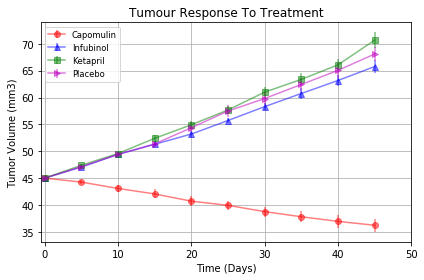

In [5]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
drugs =["Capomulin","Infubinol","Ketapril","Placebo"]
colors = ("r", "b", "g", "m")
markers = ("o","^","s",">")
num_drugs = len(drugs)
for i in range(num_drugs):
    ax.errorbar(tp, TV_mean_reform[drugs[i]], yerr=TV_sem_reform[drugs[i]], fmt="", color=colors[i], 
                marker = markers[i], alpha=0.5, label=drugs[i])

ax.set_xlim(-0.5, 50)

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.title("Tumour Response To Treatment")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.tight_layout()
plt.grid()
# Save the Figure
plt.savefig("Pymaceutical_Tumor_Response.png")
#Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Met = mouse_clinical.groupby(["Drug","Timepoint"])
Met_mean = Met["Metastatic Sites"].mean()
# Convert to DataFrame
Met_mean =(pd.DataFrame(Met_mean)).reset_index()

# Preview DataFrame
Met_mean.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Met_sem = Met["Metastatic Sites"].sem()
# Convert to DataFrame
Met_sem =(pd.DataFrame(Met_sem)).reset_index()
# Preview DataFrame
Met_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
Met_mean_reform = Met_mean.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")
Met_sem_reform = Met_sem.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")
# Preview that Reformatting worked
Met_sem_reform.head()
Met_mean_reform.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


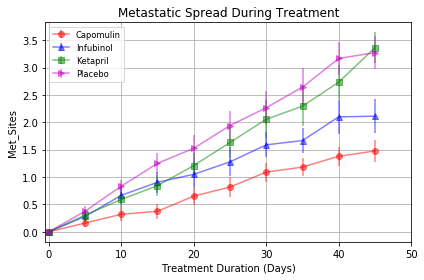

In [9]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
for i in range(num_drugs):
    ax.errorbar(tp, Met_mean_reform[drugs[i]], yerr=Met_sem_reform[drugs[i]], fmt="", color=colors[i], 
                marker = markers[i], alpha=0.5, label=drugs[i])

ax.set_xlim(-0.5, 50)

ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met_Sites")
plt.title("Metastatic Spread During Treatment")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.tight_layout()
plt.grid()
# Save the Figure
plt.savefig("Pymaceutical_Mestatic_Spread.png")
#Show the Figure
plt.show()


## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Mouse = mouse_clinical.groupby(["Drug","Timepoint"])
Mouse_count = Mouse["Mouse ID"].nunique()
# Convert to DataFrame
Mouse_count =(pd.DataFrame(Mouse_count)).reset_index()
Mouse_count = Mouse_count.rename(columns={"Mouse ID": "Mouse count"})
# Preview DataFrame
Mouse_count.head()

,Drug,Timepoint,Mouse count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
Mouse_count_reform = Mouse_count.pivot(index="Timepoint",columns="Drug",values="Mouse count")
# Preview that Reformatting worked
Mouse_count_reform.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


In [12]:
# Calculate Survival Rate for percentages and creating a dataframe
Mouse_count["Survival Rate"] = (Mouse_count["Mouse count"]/25)*100
Mouse_percent_reform = Mouse_count.pivot(index="Timepoint",columns="Drug",values="Survival Rate")
Mouse_percent_reform.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,64.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,64.0,92.0,80.0,68.0


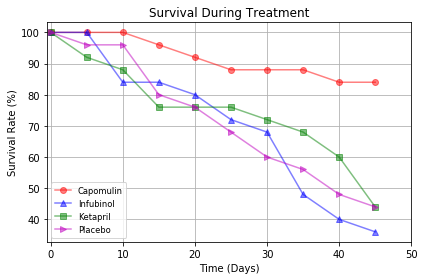

In [13]:
# Save the Figure
fig, ax = plt.subplots()
for i in range(num_drugs):
    plt.plot(tp, Mouse_percent_reform[drugs[i]],color=colors[i],
                marker = markers[i], alpha=0.5, label=drugs[i])

ax.set_xlim(-0.5, 50)

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")
plt.legend(loc="lower left", fontsize="small", fancybox=True)
plt.tight_layout()
plt.grid()
# Save the Figure
plt.savefig("Pymaceutical_Survival_Rate.png")
#Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Creating a pivot table for Tumor Volume Percent 
TV_mean["Tumor Percent Volume"] = (TV_mean["Tumor Volume (mm3)"]/45)*100
Volume_percent_reform = TV_mean.pivot(index="Timepoint",columns="Drug",values="Tumor Percent Volume")
Volume_percent_reform.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
5,98.369081,103.340113,104.582225,105.309277,103.991329,104.723532,104.997705,97.655243,105.616559,104.115152
10,95.742868,107.300278,109.786463,110.182820,108.209355,109.829621,109.114535,94.515461,109.919653,108.199737
15,93.476261,111.320122,113.991992,116.444386,113.184485,114.132759,113.482930,92.211246,114.509797,112.842353
20,90.480723,115.904552,118.217091,122.046522,119.209083,120.809816,118.548305,89.418500,120.149766,118.156297
25,88.754506,120.639276,123.811672,128.175515,126.071039,127.739053,123.342528,86.609555,124.813607,123.184300
30,86.154087,126.154483,129.554216,135.543349,132.354463,132.909029,129.325276,86.006972,132.948306,128.252291
35,84.037420,130.727884,134.983247,140.825969,139.300193,138.712478,134.111553,83.226659,138.757110,133.531938
40,82.128891,136.595323,140.361832,146.819067,145.779453,144.561500,140.101193,81.275735,145.236413,139.814871


In [15]:
# Calculate the percent changes for each drug by subtracting last row from the first row in Tumor Percent Volume Table
Change_percent = Volume_percent_reform.diff(periods=num_rows-1)
#Dropping the index column 
mod_change_percent = Change_percent.reset_index(drop=True)
#Dropping the NAN values in rows due to "diff" operation
reform_change_percent = mod_change_percent.dropna()
# Previewing the results
series_percent_change = reform_change_percent.iloc[0]
series_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 9, dtype: float64

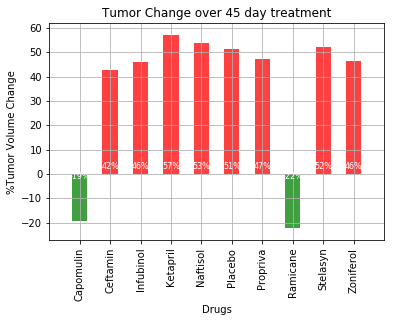

In [16]:
# Store all Relevant Percent Changes into a Tuple

actual_drugs = TV_mean["Drug"].unique()

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
colors = []
for value in series_percent_change:
   if value <= 0:
       colors.append('g')
   else:
       colors.append('r')

# Orient widths. Add labels, tick marks, etc. 
x_axis = np.arange(0, len(actual_drugs))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Tumor Change over 45 day treatment")
plt.xlabel("Drugs")
plt.ylabel("%Tumor Volume Change")

plt.xlim(-1, 10)
plt.ylim(min(series_percent_change)-5, max(series_percent_change) + 5)

plt.bar(x_axis, series_percent_change, color=colors, alpha=0.75, align="center",width =0.5)
plt.xticks(tick_locations, actual_drugs,rotation=90)
# Use functions to label the percentages of changes

for i in range(len(tick_locations)):
    y_pos = np.sign(series_percent_change[i])*2
    percent_label = str(int(series_percent_change[i]))+"%"
    plt.text(x = tick_locations[i] , y = y_pos, s = percent_label , size = 8,horizontalalignment ='center',color="white")
 
plt.rcParams["figure.figsize"] = [12,9]

plt.grid()

# Save the Figure
plt.savefig("Pymaceutical_Percent_Change.png",bbox_inches="tight")
plt.show()

